# NLP on Yelp Open Dataset for Review Classification - Data Analysis

## Import Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
%%time
df = pd.read_csv('./data/yelp_academic_base_dataset.csv')

CPU times: user 39.4 s, sys: 8.67 s, total: 48.1 s
Wall time: 50 s


In [8]:
df.head()

,businessId,meanStars,reviewCount,reviewStars,text,date
0,6iYb2HFDywm3zjuRg0shjw,4.0,86,5.0,Stopped in on a busy Friday night. Despite the...,2018-03-04 00:59:21
1,tCbdrRPZA0oiIYSmHG3J0w,4.0,126,4.0,Elephant's contacted me the same day I posted ...,2012-07-16 05:04:05
2,tCbdrRPZA0oiIYSmHG3J0w,4.0,126,5.0,I'm not usually a fan of airport food. I usual...,2015-04-28 21:11:10
3,tCbdrRPZA0oiIYSmHG3J0w,4.0,126,4.0,"If one must have breakfast at the airport, per...",2015-11-18 18:50:05
4,tCbdrRPZA0oiIYSmHG3J0w,4.0,126,5.0,"Reasonably priced, tasty local joint. Lots of ...",2011-11-30 20:15:41


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6968549 entries, 0 to 6968548
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   businessId   object 
 1   meanStars    float64
 2   reviewCount  int64  
 3   reviewStars  float64
 4   text         object 
 5   date         object 
 6   textLength   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 372.2+ MB


In [82]:
df.describe()

,meanStars,reviewCount,reviewStars,textLength
count,6.968549e+06,6.968549e+06,6.968549e+06,6.968547e+06
mean,3.770948e+00,4.040217e+02,3.765686e+00,5.954547e+02
std,7.329119e-01,7.504751e+02,1.463478e+00,5.529578e+02
min,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00
25%,3.500000e+00,5.600000e+01,3.000000e+00,2.400000e+02
50%,4.000000e+00,1.740000e+02,4.000000e+00,4.270000e+02
75%,4.500000e+00,4.440000e+02,5.000000e+00,7.550000e+02
max,5.000000e+00,9.185000e+03,5.000000e+00,5.000000e+03


Text(0.5, 1.0, 'Stars evaluation distribution')

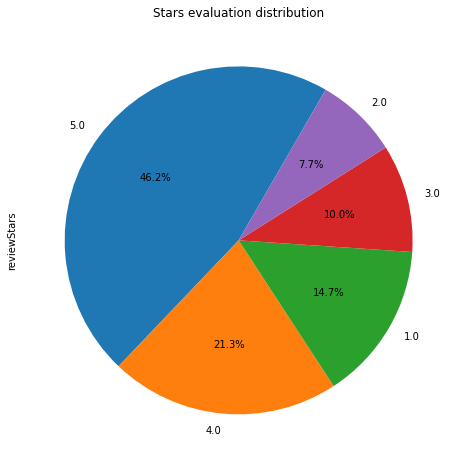

In [23]:
plt.figure(figsize=(8,8))
df['reviewStars'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Stars Rating Distribution')

In [72]:
# Adding text length for data analysis
df['textLength']  = df['seller_name'].str.len()

0          5
1          4
2          5
3          4
4          5
          ..
6968544    5
6968545    2
6968546    5
6968547    3
6968548    5
Name: reviewStars, Length: 6968549, dtype: int64

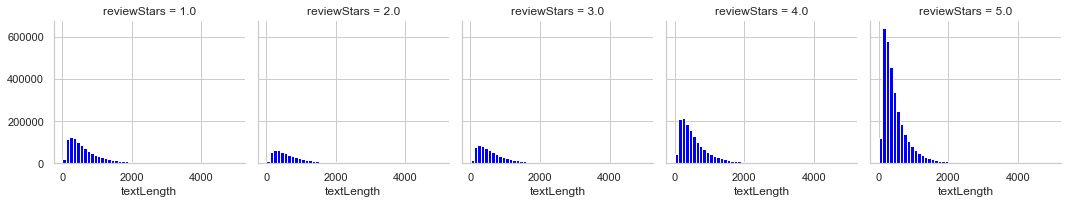

In [84]:
graph = sns.FacetGrid(data=df,col='reviewStars')
graph.map(plt.hist,'textLength',bins=50,color='blue')

In [89]:
stval = df.groupby('businessId').mean()
stval.corr()

,meanStars,reviewCount,reviewStars,textLength
meanStars,1.000000,0.032057,0.987082,-0.211441
reviewCount,0.032057,1.000000,0.033209,-0.009019
reviewStars,0.987082,0.033209,1.000000,-0.217405
textLength,-0.211441,-0.009019,-0.217405,1.000000


In [90]:
df.isna().values.any()

True

In [105]:
df.dropna(inplace=True)
df.isna().values.any()

False